***<h3>BAYESIAN EXERCISES</h3>***

***EXERCISE 1***:  
Provide a small and concise example of how bayesian statistics can be applied in your study degree. You should provide references to your answer if you don’t come up with an example on your own.

Bayesian Statistics played a profound role in the development of Natural Language Processing in the 90s.(Cohen, 2022)  
A great example of the use of Bayesian Statistics in NLP is sentiment analysis, for example, as used in **movie reviews or tweets**.  
$$P\left(w_{k} | c_{i}\right)=\frac{\operatorname{count}\left(w_{k}, c_{i}\right)+1}{\sum_{w \in V} \operatorname{count}\left(w, c_{i}\right) + |V|}$$  
- **The prior:** $P(c_{i})$ representing the likelihood of a document being in class $c_{i}$, without considering any specific words.  
- **The likelihood function:** where $P\left(w_{k} | c_{i}\right)$ represents the probability of observing word $w_{k}$ given that the documents belongs to the class $c_{i}$. 
    - Then the numerator $\operatorname{count}\left(w_{k}, c_{i}\right)+1$ denotes the number of occurrences of word $w_{k}$ in documents belonging to the class $c_{i}$, with laplace smoothing. 
    - Finally the denominator $\sum_{w \in V} \operatorname{count}\left(w, c_{i}\right) + |V|$ is the laplace smoothed sum of the counts of all the words in the vocabulary that appear in the documents of the class $c_{i}$, plus the size of the vocabulary multiplied by the Laplace smoothing parameter.  
- **The posterior:** $P(w_{1}, w_{2}, ..., w_{n}) = \sum_{i} P(w_{1}, w_{2}, ...,w_{n}|c_{i}) \times P(c_{i})$ shows us the probability of the document belonging to class $c_{i}$ given the words $w_{1}, w_{2}, ..., w_{n}$ present in the document.  

***EXERCISE 2***:  
Consider the following derivation of the ELBO, a quantity used in variational Bayes inference. For
each of the 4 lines in the derivation, explain its justification (hint: remember the “three power tools
of statistics”).  

1. $\log p_{\boldsymbol{\theta}}(\mathbf{x})=\mathbb{E}_{q_\phi(\mathbf{z} \mid \mathbf{x})}\left[\log p_{\boldsymbol{\theta}}(\mathbf{x})\right]$ This line states that the log likelihood of observing data x is equal to the expectation of the log likelihood under the variational distribution $q_\phi(\mathbf{z} \mid \mathbf{x})$.  
  
2. $= \mathbb{E}_{q_\phi(\mathbf{z} \mid \mathbf{x})}\left[\log \left[\frac{p_{\boldsymbol{\theta}}(\mathbf{x}, \mathbf{z})}{p_{\boldsymbol{\theta}}(\mathbf{z} \mid \mathbf{x})}\right]\right]$ This lines uses the definition of joint and conditional probability to express $p(x)$ in terms of joint and conditional probabilities.  
  
3. $=\mathbb{E}_{q_\phi(\mathbf{z} \mid \mathbf{x})}\left[\log \left[\frac{p_{\boldsymbol{\theta}}(\mathbf{x}, \mathbf{z})}{q_{\boldsymbol{\phi}}(\mathbf{z} \mid \mathbf{x})} \frac{q_\phi(\mathbf{z} \mid \mathbf{x})}{p_\theta(\mathbf{z} \mid \mathbf{x})}\right]\right]$ The third line applies the property of logarithms where the difference of logarithms is the logarithm of the quotient. This is done in order to obtain the last step, or line 4.
  
4. $=\underbrace{\mathbb{E}_{q_\phi(\mathbf{z} \mid \mathbf{x})}\left[\log \left[\frac{p_{\boldsymbol{\theta}}(\mathbf{x}, \mathbf{z})}{q_\phi(\mathbf{z} \mid \mathbf{x})}\right]\right]}_{=\mathcal{L}_{\boldsymbol{\theta}, \phi}(\mathbf{x})}+\underbrace{\mathbb{E}_{q_\phi(\mathbf{z} \mid \mathbf{x})}\left[\log \left[\frac{q_\phi(\mathbf{z} \mid \mathbf{x})}{p_{\boldsymbol{\theta}}(\mathbf{z} \mid \mathbf{x})}\right]\right]}_{=D_{K L}\left(q_\phi(\mathbf{z} \mid \mathbf{x}) \| p_{\boldsymbol{\theta}}(\mathbf{z} \mid \mathbf{x})\right)}$ This last line, following the third line splits the expectation in two terms. The first represents ELBO and the second one represents Kullback-Leibler divergence between the variational distribution and the true posterior.  

***EXERCISE 3***  
Consider the following pyMC3 model for Bayesian linear regression. There are 4 lines with errors.
Identify them, correct the error, and explain why it was an error (i.e., not just what was wrong, but
WHY it was wrong).

In [ ]:
#Define the model
with pm.Model() as model:

    x = pm.Data('x', x_data)
    y = pm.Data('y_obs', y_data)
    
    a = pm.Normal('slope', mu=0, sigma=1)  #set mu to 0 and sigma to 1
    b = pm.Normal('intercept', mu=0, sigma=1) #set mu to 0 and sigma to 1
    s = pm.HalfNormal('sigma', sigma=0.001) #change function from pm.Normal() to pm.HalfNormal()

    mu = pm.Deterministic('mu', a*x+b) #add definition of mu as a deterministic variable to the model

    likelihood = pm.Normal('y', mu=mu, sigma=s, observed=y) #add the observed data to the model

    step = pm.NUTS()

    trace = pm.sample(1000, tune= 1000, init=None, step=step, cores=2)

1. Setting a mu so high can make the model be overtly biased towards higher values of the slope and intercept. (2 mistakes)  
2. A standard deviation that large allows for a vast amount of plausible values, while it might be indicative of uncertainty, it will definitely make the prior less informative and therefore resulting in not regularizing the model properly. (2 mistakes)  
3. Thirdly, the function used to determinate s can't be a normal since the standard deviation used in the likelihood can't be negative, it therefore must be a HalfNormal. (1 mistake)  
4. The observed data is presently doing nothing, it must be included in the definition for the likelihood so the function has data to propagate from. Also  (1 mistake)
5. The mu used in the likelihood function should be defined using the pm.Deterministic() to properly represent the deterministic relationship between the data and the parameters. (1 mistake)

***EXERCISE 4***
- Perform 2-means clustering of the input data in IDSWeedCropTrain.csv. For the submission, initialize the cluster centers with the first two data points in IDSWeedCropTrain.csv (that is not a recommended initialization technique, but makes it easier to correct the assignment). [Visualization] Assuming we can get a rough idea about our data clusters by taking a look at 2 of the 13 features, make two scatter plots of your test split clusters by using:  
    - Feature 6 and Feature 7 (e.g. you can get feature 6 by using the 6th column XTest[:, 6]).
    - Feature 1 and Feature 2
- Compare the difference in the scatter plots and summarize your observations on using the different
selected features. (Hints: you can use sns.scatterplot() for visualization)

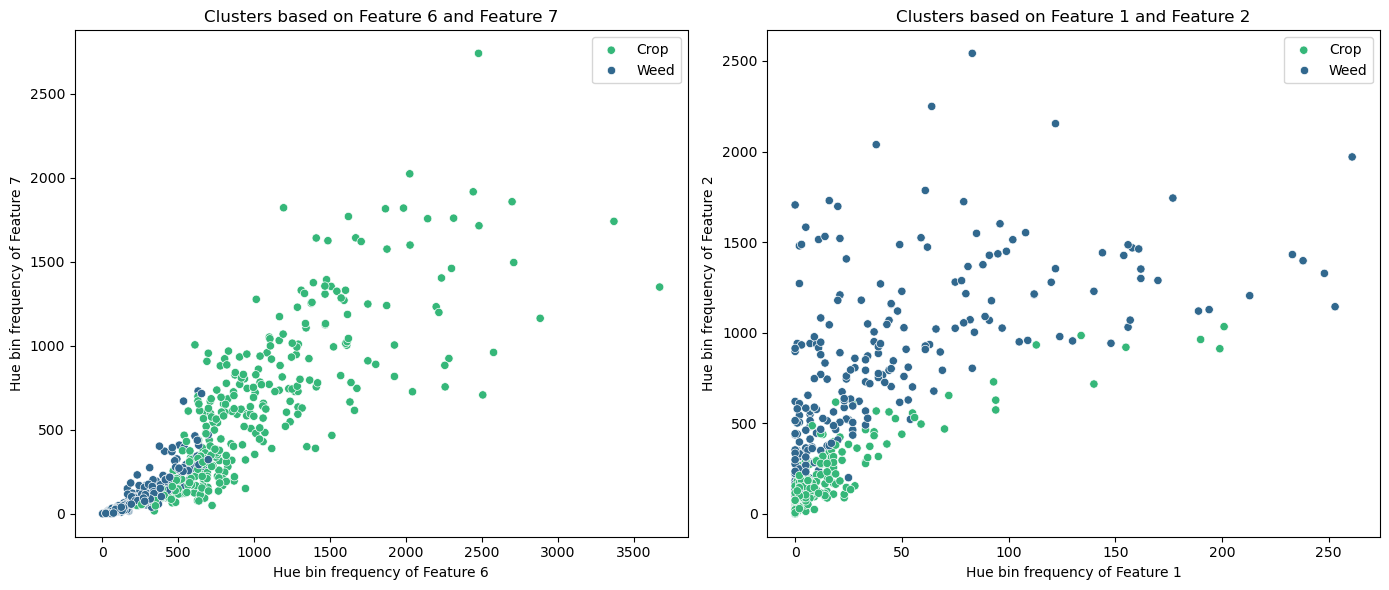

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataTrain = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
dataTest = np.loadtxt('IDSWeedCropTest.csv', delimiter=',')

XTrain = dataTrain[:, :-1]
YTrain = dataTrain[:, -1]
XTest = dataTest[:, :-1]
YTest = dataTest[:, -1]

#get the first two rows of the training data
startingPoint = np.vstack((XTrain[0,], XTrain[1,]))

#create instance of KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, n_init=1, init=startingPoint, algorithm='lloyd')
kmeans.fit(XTrain)

#predict the labels of the test data
test_labels = kmeans.predict(XTest)

#plot the clusters
plt.figure(figsize=(14, 6))

#plot the clusters based on Feature 6 and Feature 7
plt.subplot(1, 2, 1)
sns.scatterplot(x=XTest[:, 6], y=XTest[:, 7], hue=test_labels, palette='viridis')
plt.title('Clusters based on Feature 6 and Feature 7')
plt.xlabel('Hue bin frequency of Feature 6')
plt.ylabel('Hue bin frequency of Feature 7')
plt.legend(['Crop', 'Weed'], loc='upper right')

#plot the clusters based on Feature 1 and Feature 2
plt.subplot(1, 2, 2)
sns.scatterplot(x=XTest[:, 1], y=XTest[:, 2], hue=test_labels, palette='viridis')
plt.title('Clusters based on Feature 1 and Feature 2')
plt.xlabel('Hue bin frequency of Feature 1')
plt.ylabel('Hue bin frequency of Feature 2')
plt.legend(['Crop', 'Weed'], loc='upper right')

plt.tight_layout()
plt.show()

In the plots above, we applied Lloyd's algorithm to cluster information from provided CSV files. Initially, we initialized two cluster centers using the first two data points from the training dataset. Then, the algorithm was executed with these two seeds. Providing seed centroids to K-means facilitates calculations, adds more control over the results, and aids in better representing the data. This is necessary because K-means can be highly sensitive to the initial placement of centroids. However, it's crucial to note that the quality of the seeds must be good, as poor initialization can result in suboptimal clustering outcomes.
In the first scatterplot (features 6 and 7), we can see how the lower frequencies of both features were assigned to cluster Weed, and the higher frequencies were assigned to the Crop cluster. In the second scatterplot (features 1 and 2),  we can see a different tendency here, that higher values from feature 2 were assigned generally to cluster Weed, and lower values of the same feature were assigned to the Crop cluster in this case.

***EXERCISE 5***
1. Open and read image into np.array. Use the elbow method to choose the number of k clusters (kvaries between 1 and 10).
2. Now, with the best observed k value implement k-means clustering on the image and display original and compressed image

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

dog_img = imread('dog.jpg')
dog_2d = dog_img.reshape(dog_img.shape[0] * dog_img.shape[1], dog_img.shape[2])

startingPoint_list = np.unique(dog_2d, axis = 0)

kvalues = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
kinertia = []

for i, k in enumerate(kvalues):
    i+=1
    kmeans = KMeans(n_clusters=k, algorithm='lloyd', n_init=1, init=startingPoint_list[:i]).fit(dog_2d)
    inertia = kmeans.inertia_
    kinertia.append(inertia)

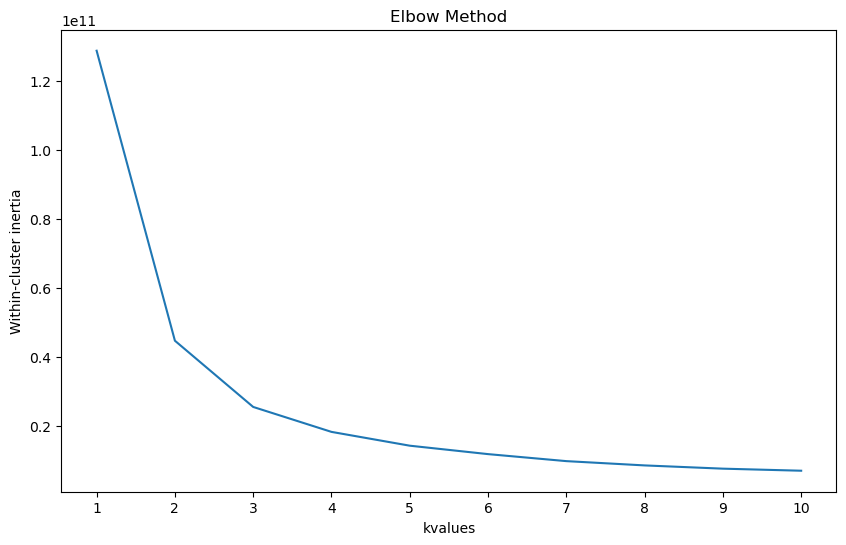

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(kvalues, kinertia, '-')
plt.title("Elbow Method")
plt.xlabel("kvalues")
plt.xticks(kvalues)
plt.ylabel("Within-cluster inertia")
plt.show()

In graph above we calculated the optimal kvalue for kmeans, where we plot the inertia of each cluster agaisnt the number of clusters (kvalues). Using the elbow method then we identify the elbow then at kvalue 3.

In [ ]:
kmeans = KMeans(n_clusters=3, algorithm='lloyd', n_init=1, init=startingPoint_list[:3]).fit(dog_2d)

dog_labels = kmeans.predict(dog_2d)
dog_clustered = kmeans.cluster_centers_

dog_compressed = np.empty(dog_2d.shape)

<h3>References:</h3>
Cohen, S. (2022). <em>Bayesian analysis in natural language processing</em>. Springer Nature.<br>  
GitHub Copilot v1.162.0 was used as assistance while developing the code for this assignment.